<h4><strong>Họ tên SV: Phạm Thành Nhân</strong></h4>
<h4><strong>Mã số SV: 22127307</strong></h3>

# <div align="center">Bài Tập 1 - Thống Kê Máy Tính Và Ứng dụng</div>

### Import các thư viện cần thiết

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Problem Description

<p>An and Binh play a game consisting of multiple rounds. The first player to reach 10 points wins the game. Each round has only one winner. Assume that the rounds are independent and that An has a 0.6 probability of winning each round.</p>

<ul>
    <li>Calculate the probability that An wins the game if the winner of each round earns 2 points.</li>
    <li>Same as (a), but if the winner also won the previous round, they earn an additional 1 point.</li>
    <li>Calculate the expected number of rounds required for An to win in cases (a) and (b).</li>
</ul>

### `(a) Tính xác suất An thắng trò chơi nếu người thắng mỗi ván được 2 điểm.`

#### <div align="center"><strong>Phương pháp giải toán thuần túy</strong></div>

### `(b) Nếu người thắng cũng thắng ván ngay trước đó thì được thêm 1 điểm.`

#### <div align="center"><strong>Phương pháp giải toán thuần túy</strong></div>

In [3]:
# Code mô phỏng cho phương pháp sử dụng quy hoạch động (Dynamic Programming)

def calculate_probability(p):
    q = 1 - p
    max_score = 10
    
    dp = {L: [[0] * (max_score + 1) for _ in range(max_score + 1)] for L in [None, 'A', 'B']}

    for L in [None, 'A', 'B']:
        for b in range(max_score + 1):
            dp[L][10][b] = 1
    
        for a in range(max_score + 1):
            dp[L][a][10] = 0
    
    for a in range(max_score - 1, -1, -1):
        for b in range(max_score - 1, -1, -1):
            for L in [None, 'A', 'B']:
                a_next = a + (3 if L == 'A' else 2)
                if a_next >= max_score:
                    win_A = 1
                else:
                    win_A = dp['A'][a_next][b]

                b_next = b + (3 if L == 'B' else 2)
                if b_next >= max_score:
                    win_B = 0
                else:
                    win_B = dp['B'][a][b_next]

                dp[L][a][b] = p * win_A + q * win_B

    return dp[None][0][0]

p = 0.6
print("Xác suất An thắng:", calculate_probability(p))

Xác suất An thắng: 0.7188341759999999


### `(c) Tính trung bình số ván cần chơi.`

#### <div align="center"><strong>Phương pháp mô phỏng</strong></div>

In [5]:
def monte_carlo_simulation(num_games=100000, p=0.6, target_score=10, part='a'):
    total_rounds = 0
    an_wins = 0

    simulate_game_fn = simulate_game if part == 'a' else simulate_game_bonus

    for _ in range(num_games):
        rounds, an_win = simulate_game_fn(p, target_score)
        total_rounds += rounds
        an_wins += an_win

    probability_an_wins = an_wins / num_games
    average_rounds = total_rounds / num_games

    return probability_an_wins, average_rounds

num_games = 100000

print("Trung bình số ván cần chơi (a):", monte_carlo_simulation(num_games, p=0.6, target_score=10, part='a')[1])
print("Trung bình số ván cần chơi (b):", monte_carlo_simulation(num_games, p=0.6, target_score=10, part='b')[1])

Trung bình số ván cần chơi (a): 7.34864
Trung bình số ván cần chơi (b): 6.05333


### Câu 2

### `c) Phân phối của W=max{U,V}, với V~U(0,1) và độc lập với U`

#### <div align="center"><strong>Phương pháp giải toán thuần túy</strong></div>

Giả sử $ U, V \sim \text{U}(0,1) $ và độc lập với nhau. Khi đó, ta có:

$$
F_W(w) = P(W \leq w) = P(\max\{U,V\} \leq w) = P(U \leq w \text{ và } V \leq w).
$$

Do \( U \) và \( V \) độc lập nên:

$$
F_W(w) = P(U \leq w) \cdot P(V \leq w) = w \times w = w^2, \quad 0 \leq w \leq 1.
$$

Hàm mật độ xác suất của \( W \) là:

$$
f_W(w) = \frac{d}{dw} F_W(w) = \frac{d}{dw} (w^2) = 2w, \quad 0 \leq w \leq 1.
$$

Vậy biến ngẫu nhiên $ W = \max\{U, V\} $ có:
- Hàm phân phối tích lũy: $ F_W(w) = w^2 $, với $ 0 \leq w \leq 1 $.
- Hàm mật độ xác suất: $ f_W(w) = 2w $, với $ 0 \leq w \leq 1 $.

#### <div align="center"><strong>Phương pháp mô phỏng</strong></div>

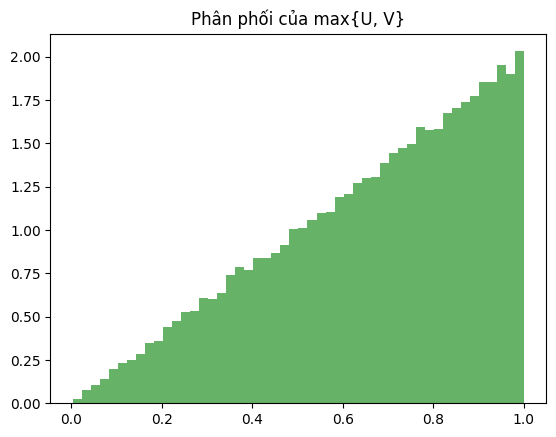

In [8]:
def max_uv(num_samples=100000):
    U = np.random.uniform(0, 1, num_samples)
    V = np.random.uniform(0, 1, num_samples)
    return np.maximum(U, V)

samples = max_uv()
plot_distribution(samples, "Phân phối của max{U, V}")

### Câu 3

### `a) Tính E(D) khi k = 1`

#### <div align="center"><strong>Phương pháp giải toán thuần túy</strong></div>

Khi $k=1$, hai điểm $x, y$ được chọn ngẫu nhiên trên $[0,1]$. Khi đó khoảng cách giữa chúng là:

$$
D = |x - y|
$$

Ta có:

$$
E(D) = \int_0^1 \int_0^1 |x-y|\,dx\,dy = 2 \int_0^1 \int_0^x (x-y)\,dy\,dx.
$$

Tính tích phân bên trong:

$$
\int_0^x (x-y)\,dy = \left[xy - \frac{y^2}{2}\right]_{0}^{x} = x^2 - \frac{x^2}{2} = \frac{x^2}{2}.
$$

Do đó, giá trị của E(D) khi k = 1:

$$
E(D) = 2 \int_0^1 \frac{x^2}{2}\,dx = \int_0^1 x^2\,dx = \frac{1}{3}.
$$

#### <div align="center"><strong>Phương pháp mô phỏng</strong></div>

In [9]:
n = 10000000
x = np.random.rand(n)
y = np.random.rand(n)

D = np.abs(x - y)
E_D = np.mean(D)

print(E_D)

0.3334090009396935


#### <div align="center"><strong>Kết luận</strong></div>

In [10]:
print('Với k = 1, giá trị E(D) khi tính toán lý thuyết là: ', 1/3)
print('Với k = 1, giá trị E(D) khi thực hiện mô phỏng là: ', E_D)

Với k = 1, giá trị E(D) khi tính toán lý thuyết là:  0.3333333333333333
Với k = 1, giá trị E(D) khi thực hiện mô phỏng là:  0.3334090009396935


### `b) Tính E(D) khi k = 2`

#### <div align="center"><strong>Phương pháp giải toán thuần túy</strong></div>

Khi $ k = 2 $, hai điểm $ A $ và $ B $ được chọn ngẫu nhiên trong miền $ S = [0,1]^2 $, nghĩa là:

$$
A = (X_1, Y_1), \quad B = (X_2, Y_2)
$$

Khoảng cách Euclid giữa hai điểm này là:

$$
D = \sqrt{(X_2 - X_1)^2 + (Y_2 - Y_1)^2}
$$

Ta cần tính giá trị kỳ vọng:

$$
E(D) = \mathbb{E} \left[ \sqrt{(X_2 - X_1)^2 + (Y_2 - Y_1)^2} \right]
$$

Một kết quả đã biết trong lý thuyết xác suất cho trường hợp hai điểm ngẫu nhiên trong miền $ [0,1]^2 $ là:

$$
E(D) = \int_0^1 \int_0^1 \int_0^1 \int_0^1 \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} \,dx_1 \,dx_2 \,dy_1 \,dy_2 \quad (1)
$$

Bằng cách sử dụng các phương pháp giải tích hoặc kết quả tra cứu trong tài liệu toán học, ta có công thức:

$$
E(D) \approx \frac{1}{15} \left( 2 + \sqrt{2} + 5 \ln(1 + \sqrt{2}) \right) \approx 0.5214 \quad (2)
$$

Vậy, kỳ vọng của khoảng cách giữa hai điểm ngẫu nhiên trong hình vuông đơn vị là:

$$
E(D) \approx 0.5214
$$

Nguồn tham khảo cho việc chứng minh 2 công thức $(1)$ và $(2)$ trên: https://www.youtube.com/watch?v=i4VqXRRXi68

#### <div align="center"><strong>Phương pháp mô phỏng</strong></div>

In [11]:
n = 10000000
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y1 = np.random.rand(n)
y2 = np.random.rand(n)

D = np.sqrt((x1 - y1)**2 + (x2 - y2)**2)
E_D = np.mean(D)

print('E(D) = ', E_D)

E(D) =  0.5214578090497356


#### <div align="center"><strong>Kết luận</strong></div>

In [12]:
print('Với k = 2, giá trị E(D) khi tính toán lý thuyết là: ', (math.sqrt(2) + 2 + 5*math.log(1+math.sqrt(2))) / 15)
print('Với k = 2, giá trị E(D) khi thực hiện mô phỏng là: ', E_D)

Với k = 2, giá trị E(D) khi tính toán lý thuyết là:  0.5214054331647207
Với k = 2, giá trị E(D) khi thực hiện mô phỏng là:  0.5214578090497356


### `c) Khảo sát r theo k = 1, 2, ..., 10`

#### <div align="center"><strong>Phương pháp giải toán thuần túy</strong></div>

Khoảng cách Euclidean giữa hai điểm $A=(a_1, a_2, \dots, a_k)$ và $B=(b_1, b_2, \dots, b_k)$ trong không gian $k$-chiều được tính bằng công thức:

$$D = \sum_{i=1}^{k} (a_i - b_i)^2$$

Chúng ta muốn tìm kỳ vọng $E(D)$, sau đó chuẩn hóa theo $k$:

$$r_k = \frac{E(D)}{k}$$

và kiểm tra xem giới hạn của $r_k$ khi $k \to \infty$ có phải là:

$$\lim_{k \to \infty} r_k = \frac{1}{\sqrt{6}} \approx 0.4082$$

Mỗi tọa độ $a_i, b_i$ là các biến ngẫu nhiên độc lập tuân theo phân bố đều trên đoạn $[0,1]$, do đó:

$$X_i = a_i - b_i$$

là một biến ngẫu nhiên có phân phối đối xứng trên đoạn $[-1,1]$. Ta cần tính:

$$E[X_i^2] = E[(a_i - b_i)^2]$$

Ta biết rằng nếu $U, V$ là hai biến ngẫu nhiên độc lập, phân bố đều trên $[0,1]$, thì:

$$E[(U - V)^2] = \text{Var}(U) + \text{Var}(V) = \frac{1}{12} + \frac{1}{12} = \frac{1}{6}$$

Vậy:

$$E[(a_i - b_i)^2] = \frac{1}{6}$$

Từ đó, ta có tổng kỳ vọng của bình phương khoảng cách:

$$E(D^2) = \sum_{i=1}^{k} E[(a_i - b_i)^2] = k \cdot \frac{1}{6} = \frac{k}{6}$$

Hàm căn bậc hai $f(x) = \sqrt{x}$ là một hàm lồi. Do đó, áp dụng bất đẳng thức Jensen (1): 

$$E(D) = E[\sqrt{D^2}] \leq \sqrt{E(D^2)} = \sqrt{\frac{k}{6}}$$

Từ đây, ta nhận thấy rằng:

$$r_k = \frac{E(D)}{k}$$

Thỏa mãn:

$$r_k < \frac{\sqrt{k/6}}{k} = \frac{1}{\sqrt{6}} \approx 0.4082$$

Từ kết quả trên, ta dự đoán rằng $r_k$ sẽ hội tụ đến $\frac{1}{\sqrt{6}}$ khi $k \to \infty$.

Nguồn tham khảo cho bất đẳng thức (1):
- https://diendantoanhoc.org/topic/195918-ki%E1%BA%BFn-th%E1%BB%A9c-c%C6%A1-s%E1%BB%9F-v%E1%BB%81-b%E1%BA%A5t-%C4%91%E1%BA%B3ng-th%E1%BB%A9c-jensen/
- https://www.mathvn.com/2021/05/bat-ang-thuc-jensen-cac-he-qua-va-vi-du.html

#### <div align="center"><strong>Phương pháp mô phỏng</strong></div>

In [13]:
# (a), (b), (c) Tính kỳ vọng khoảng cách giữa hai điểm trong không gian k-chiều.

def expected_distance(k, num_samples=100000):
    points = np.random.uniform(0, 1, (num_samples, 2, k))
    distances = np.linalg.norm(points[:, 0, :] - points[:, 1, :], axis=1)
    return distances.mean()

results = {k: expected_distance(k) for k in range(1, 11)}

for k, value in results.items():
    print(f"k = {k}, E(D) = {value}, r_k = {value / np.sqrt(k)}")

k = 1, E(D) = 0.333091484369973, r_k = 0.333091484369973
k = 2, E(D) = 0.5208303667284581, r_k = 0.36828268416156906
k = 3, E(D) = 0.6620172256384161, r_k = 0.3822158234305088
k = 4, E(D) = 0.7776801145710083, r_k = 0.38884005728550414
k = 5, E(D) = 0.876602558020784, r_k = 0.3920285817969353
k = 6, E(D) = 0.968980740932217, r_k = 0.39558473097798497
k = 7, E(D) = 1.0513415319206059, r_k = 0.3973697480650854
k = 8, E(D) = 1.1287476582347409, r_k = 0.3990725616931104
k = 9, E(D) = 1.2002188667794775, r_k = 0.4000729555931592
k = 10, E(D) = 1.2674354897584694, r_k = 0.40079829349677765


### Câu 4

### `(a) So sánh hai thuật toán.`

#### <div align="center"><strong>Giải thích bằng toán học</strong></div>

#### Xét hai thuật toán

1. **Thuật toán 1 (Duyệt tuần tự từ đầu mảng)**  
   - Khởi tạo `i = 1`.  
   - Kiểm tra từng phần tử từ **chỉ số 1 đến n**.  
   - Nếu gặp phần tử **bằng 1**, trả về vị trí đó.  

2. **Thuật toán 2 (Chọn ngẫu nhiên một vị trí trong mảng)**  
   - Chọn ngẫu nhiên một vị trí `i` từ tập `[1, n]`.  
   - Nếu phần tử tại vị trí đó bằng 1, trả về vị trí đó.  
   - Nếu không, tiếp tục chọn ngẫu nhiên đến khi gặp số 1.  

#### Phân tích độ phức tạp thuật toán

1. **Thuật toán 1**
   - Vì có nửa số phần tử là 1, trung bình thuật toán sẽ cần duyệt qua **n/2 phần tử** để tìm thấy số 1 đầu tiên.
   - Trường hợp tốt nhất: Số 1 nằm ở vị trí đầu tiên (1 lần kiểm tra) => `0(1)`.
   - Trường hợp xấu nhất: Số 1 nằm ở cuối cùng (n lần kiểm tra) => `O(n)`.
   - Trung bình: Toàn bộ số 0 nằm ở đầu mảng => `O(n/2) = O(n)`

2. **Thuật toán 2**
   - Xác suất chọn một vị trí chứa số 1
   - Xác suất chọn một vị trí chứa số 1 là $ \frac{1}{2} $, vì nửa mảng là số 1.
   - Do đó, số lần lặp trung bình để chọn được số 1 là:

   $$
   E(X) = \sum_{k=1}^{\infty} k \cdot P(X = k)
   $$

      - Xác suất tìm được số 1
      - Xác suất tìm được số 1 ngay lần đầu: $ \frac{1}{2} $.
      - Xác suất tìm được số 1 ở lần thứ hai: $ \left(\frac{1}{2}\right) \cdot \left(\frac{1}{2}\right) $.
      - Xác suất tìm được số 1 ở lần thứ $ k $: $ \left(\frac{1}{2}\right)^k $.
      - Tổng kỳ vọng số lần thử cần thiết

   $$
   E(X) = \sum_{k=1}^{\infty} k \cdot \left(\frac{1}{2}\right)^k
   $$

   - Công thức tổng quát của chuỗi này là:

   $$
   E(X) = 2
   $$

   - Tức là trung bình chỉ mất **2 lần chọn** để tìm ra số 1.
   - Như vậy, **thuật toán 2** có thời gian trung bình `O(1)`, nhanh hơn nhiều so với **thuật toán 1**  `O(n)`.

#### Ổn định và tính chắc chắn  
1. **Thuật toán 1** luôn tìm được số 1 sau tối đa `O(n)` bước.  
2. **Thuật toán 2** nhanh hơn trung bình, nhưng **không đảm bảo** hoàn thành trong thời gian nhất định.  



### `(b) Thuật toán nào tốt hơn?`

| Tiêu chí | Thuật toán 1 | Thuật toán 2 |
|----------|-------------|-------------|
| **Thời gian trung bình** | `O(n)` | `O(1)` |
| **Thời gian tệ nhất** | `O(n)` | `Vô hạn` |
| **Ổn định** | Luôn tìm thấy trong `O(n)` | Rủi ro chọn sai vô hạn |
| **Dễ triển khai** | Duyệt tuần tự | Dùng random |

#### <div align="center"><strong>Phương pháp mô phỏng</strong></div>

In [14]:
def algorithm_1(a):
    i = 0
    while a[i] != 1:
        i += 1
    return i

def algorithm_2(a):
    n = len(a)
    while True:
        i = random.randint(0, n - 1)
        if a[i] == 1:
            return i

def compare_algorithms(n, num_simulations=1000):
    a = [0] * (n // 2) + [1] * (n // 2)
    random.shuffle(a)

    time_1 = sum(algorithm_1(a) for _ in range(num_simulations)) / num_simulations
    time_2 = sum(algorithm_2(a) for _ in range(num_simulations)) / num_simulations

    return time_1, time_2

n = 100
time_1, time_2 = compare_algorithms(n)
print(f"Thời gian trung bình thuật toán 1: {time_1}")
print(f"Thời gian trung bình thuật toán 2: {time_2}")

Thời gian trung bình thuật toán 1: 3.0
Thời gian trung bình thuật toán 2: 52.816


#### <div align="center"><strong>Kết luận</strong></div>

Qua các phân tích và mô phỏng trên:

- **Thuật toán 2** nhanh hơn trong hầu hết các trường hợp.  
- **Thuật toán 1** an toàn hơn và luôn chạy được trong thời gian giới hạn.  
- **Gợi ý tối ưu**: Kết hợp cả hai, bắt đầu bằng random, sau `k` lần thử chưa thành công thì chuyển sang duyệt tuần tự. 